In [12]:
# imports and setup
import numpy as np
import pandas as pd

# sklearn imports
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# EDA
import seaborn as sns

In [13]:
#all_features = ['top_charts', 'categories', 'price', 'installs', 'rating', 'rating_count', 'stars_5', 'stars_4', 'stars_3', 'stars_2',
                #'stars_1', 'has_iap', 'in_app_purchases_from', 'in_app_purchases_up_to', 'contains_ads', 'most_popular_country']

all_features = ['top_charts', 'categories', 'installs', 'rating', 'stars_5', 'stars_4', 'stars_3', 'stars_2',
                'stars_1']

df_games = pd.read_csv(r"df_games.csv")
df = df_games[all_features].copy()

In [14]:
# categorize
for name in all_features:
    df[name] = LabelEncoder().fit_transform(df[name])

In [15]:
df.head()

,top_charts,categories,installs,rating,stars_5,stars_4,stars_3,stars_2,stars_1
0,1,2,15,18813,19292,10986,8555,6259,9791
1,1,12,13,7157,1979,296,276,122,425
2,1,6,19,19245,19349,11123,8708,6396,9890
3,1,0,13,20139,16644,6478,3053,1196,4027
4,1,6,17,17105,19314,11094,8679,6340,9802


# Split data into Train and test

In [16]:
X = df.drop(columns = 'top_charts')
y = df['top_charts']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [17]:
# Initialize the classifier
gnb = GaussianNB()

# Train classifier
gnb.fit(X_train,y_train)

y_pred_train = gnb.predict(X_train)
y_pred = gnb.predict(X_test)

# Print results
print('Accuracy on Train data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on Train data=  0.8956814112920833
Accuracy on test data=  0.8974762029517073


# Model parameters

In [18]:
# get the class probabilities
gnb.class_prior_

array([0.90005895, 0.09994105])

In [19]:
gnb.theta_

array([[6.20811653e+00, 7.82385475e+00, 8.60081646e+03, 1.32959943e+03,
        4.55433322e+02, 3.12072081e+02, 1.82555835e+02, 4.07478854e+02],
       [7.82545057e+00, 1.24501365e+01, 1.22897596e+04, 8.82817695e+03,
        3.64920098e+03, 2.38023408e+03, 1.46990486e+03, 2.87450038e+03]])

<AxesSubplot:>

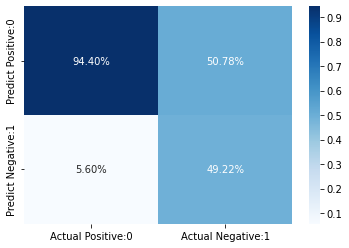

In [20]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:0', 'Actual Negative:1'],
                                 index=['Predict Positive:0', 'Predict Negative:1'])

sns.heatmap(cm_matrix/np.sum(cm_matrix), annot=True, fmt='.2%', cmap='Blues')

In [21]:
cm

array([[19393,  1198],
       [ 1150,  1161]], dtype=int64)

In [22]:
print(f'Actual:{y_test.sum()}, Pred:{y_pred.sum()}')

Actual:2311, Pred:2359
